YOUR FULL NAME

 - Collaborator 1
 - Collaborator 2
 - etc

DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 1 - Linear Regression

Due Friday Feb 13, 2025 11:30a

Total pts: 20

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - Do not rewrite code if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [58]:
import pandas as pd
import numpy as np
import sklearn as sk

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 


import matplotlib.pyplot as plt
import seaborn as sns


In [59]:
np.random.seed(1)
bias = 20*np.random.randn()

X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=5,    # n_features = 1 --> simple linear regression
                                   noise=30, 
                                   bias = bias, 
                                   random_state=1, 
                                   shuffle = False, # samples will be in order
                                   coef = True) 

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg_df = pd.DataFrame(data = X, 
             columns = column_names)
reg_df['y'] = y

reg_df

,x1,x2,x3,x4,x5,y
0,1.624345,-0.611756,-0.528172,-1.072969,0.865408,28.865495
1,-2.301539,1.744812,-0.761207,0.319039,-0.249370,4.937580
2,1.462108,-2.060141,-0.322417,-0.384054,1.133769,-39.935140
3,-1.099891,-0.172428,-0.877858,0.042214,0.582815,-49.524568
4,-1.100619,1.144724,0.901591,0.502494,0.900856,244.382026
...,...,...,...,...,...,...
295,-0.081570,1.529248,0.686483,1.717089,-0.804277,343.244347
296,0.300254,-0.429596,0.805913,-0.219552,-0.251852,20.913333
297,-1.326490,0.308204,1.115489,1.008196,-3.016032,-8.753043
298,-1.619646,2.005141,-0.187626,-0.148941,1.165335,182.614426


In [ ]:
#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 9)

#create and fit the model
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)

y_pred_train = LR_model.predict(X_train)
y_pred_test = LR_model.predict(X_test)

R2_train = LR_model.score(X_train, y_train)
R2_test = LR_model.score(X_test, y_test)

MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)

print(LR_model.__dict__)



{'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'n_features_in_': 5, 'coef_': array([43.01982633, 78.191327  , 90.23161681, 86.00466389, 67.15251811]), 'rank_': 5, 'singular_': array([17.71005276, 15.69152836, 15.10553327, 14.55190806, 13.95642601]), 'intercept_': 34.543530804297}


In [61]:
print(coef)

[42.54034656 81.07212336 94.18862462 86.99107733 70.39994983]


#### Your written answers here

What are your model parameters?
 - 

What were your MSE and R^2?
 - 



## Problem 2

Multiple Regression with Synthetic Data and Co-linearity

 - Show the correlation matrix for the 10 variables and the target variable.
 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [63]:
np.random.seed(15)
bias = 50*np.random.randn()

X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=9,    # n_features = 10 --> multiple linear regression
                                   noise=3, 
                                   bias = bias, 
                                   n_informative = 6,
                                   effective_rank = 6,
                                   random_state=15, 
                                   shuffle = False, # samples will be in order
                                   coef = True)

Xa = (0.6*X[:, 2] + 0.4*X[:, 5]).reshape(-1, 1)
X = np.hstack([X, Xa])
coef = np.append(coef, 0)

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg2_df = pd.DataFrame(data = X, 
             columns = column_names)
reg2_df['y'] = y

print_model(bias, coef, column_names, model_name = 'True Model')
reg2_df

True Model:
 y = -15.62 + 55.43*x1 + 77.93*x2 + 94.15*x3 + 16.29*x4 + 57.11*x5 + 79.90*x6


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,-0.019007,-0.081434,-0.014396,0.005781,0.041543,-0.030161,0.001037,-0.024288,-0.004252,-0.020702,-25.236430
1,0.008066,0.007271,-0.012255,-0.062581,0.032108,0.030362,-0.005309,-0.017288,0.012837,0.004792,-12.537903
2,0.032845,-0.063578,-0.009525,0.020147,-0.019702,-0.053699,-0.011607,-0.039859,-0.024391,-0.027195,-22.264183
3,-0.009999,-0.125704,0.015806,-0.008291,-0.057393,-0.063838,-0.005211,0.097825,-0.033332,-0.016052,-37.087455
4,-0.004742,0.057318,0.009264,-0.047371,0.032000,-0.038891,-0.037838,-0.076428,0.050613,-0.009998,-14.858578
...,...,...,...,...,...,...,...,...,...,...,...
295,0.033185,-0.075321,0.052960,-0.003697,0.096823,-0.053486,0.020781,0.008049,-0.005098,0.010381,-10.690334
296,0.036346,-0.018425,-0.013462,0.021404,-0.004093,-0.001489,0.049048,0.000154,0.031826,-0.008673,-18.209533
297,-0.001014,-0.073223,0.026779,0.024211,-0.042056,0.014678,-0.007562,0.000057,-0.040801,0.021938,-19.360755
298,-0.025448,0.043475,0.029118,0.053766,-0.031705,0.033905,-0.016191,0.072865,-0.004394,0.031033,-9.283116


In [64]:
reg2_df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,-0.019007,-0.081434,-0.014396,0.005781,0.041543,-0.030161,0.001037,-0.024288,-0.004252,-0.020702,-25.236430
1,0.008066,0.007271,-0.012255,-0.062581,0.032108,0.030362,-0.005309,-0.017288,0.012837,0.004792,-12.537903
2,0.032845,-0.063578,-0.009525,0.020147,-0.019702,-0.053699,-0.011607,-0.039859,-0.024391,-0.027195,-22.264183
3,-0.009999,-0.125704,0.015806,-0.008291,-0.057393,-0.063838,-0.005211,0.097825,-0.033332,-0.016052,-37.087455
4,-0.004742,0.057318,0.009264,-0.047371,0.032000,-0.038891,-0.037838,-0.076428,0.050613,-0.009998,-14.858578


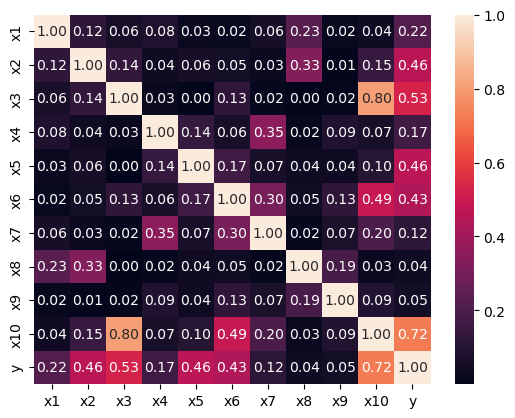

In [65]:
corr = reg2_df.corr()
sns.heatmap(np.abs(corr), annot = True, fmt = '.2f')
plt.show()

In [66]:
candidate_idx = np.array([1, 2, 4, 5, 10]) - 1
Z = X[:, candidate_idx]
Z_names = [column_names[idx] for idx in candidate_idx]

Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size=0.2)
model_LR = LinearRegression()
model_LR.fit(Z_train, y_train)

R2_train = model_LR.score(Z_train, y_train)
R2_test = model_LR.score(Z_test, y_test)

print(f'R2_train {R2_train:.2f}\nR2_test {R2_test:.2f}')

R2_train 0.86
R2_test 0.89


#### Your written answers here

What are your model parameters?
 - 

Which features (x1, x2...) were significant? Which were co-linear?
 - 
 
What were your MSE and R^2?
 - 



## Problem 3

For this problem, you'll using housing data from King County, Washington (included as kc_housing.csv).

You should refer to the class notebook.

In [77]:
import pandas as pd
housing_df = pd.read_csv('kc_house_data.csv')
housing_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


<Axes: >

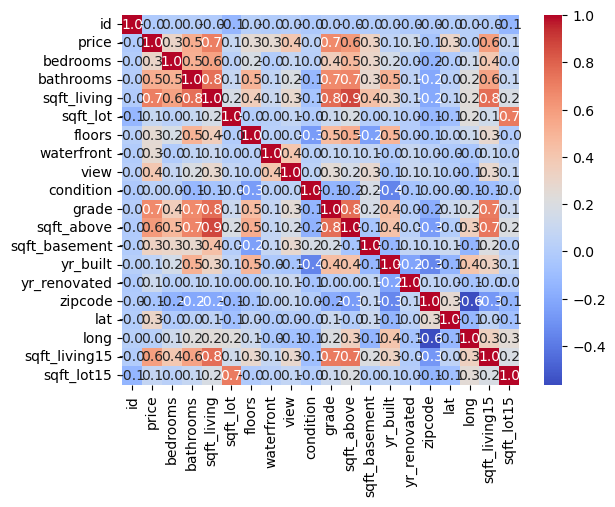

In [84]:
import pandas as pd
import seaborn as sns

# Drop the 'date' column as it cannot be converted to float
housing_df = housing_df.drop(columns=['date'])

corr_matrix = housing_df.corr()
sns.heatmap(corr_matrix, annot = True, fmt = '.1f', cmap = 'coolwarm')


### a. 

**Do this part before part b and then don't go back and change your responses.**

- Select three features to use for a multiple linear regression and justify your choices.
- Use the StandardScalar to scale your features. Fit a linear regression using those three features. What is your $R^2$?
- Plot predicted home values and actual home values, including a line representing perfect prediction.


In [85]:
X = housing_df[['bathrooms', 'sqft_living', 'grade']]
y = housing_df[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train


,bathrooms,sqft_living,grade
3908,2.00,2370,7
19660,1.50,1020,8
16916,2.50,2620,9
19429,1.50,2240,9
14444,2.50,2640,7
...,...,...,...
10000,2.50,1910,8
14821,2.50,4570,11
9823,1.75,1850,6
13954,2.75,2730,8


In [93]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)

X_scaled_train = ss.transform(X_train)
X_scaled_test = ss.transform(X_test)

model_linreg = LinearRegression()
model_linreg.fit(X_scaled_train, y_train)

y_pred_train = model_linreg.predict(X_scaled_train)
y_pred_test = model_linreg.predict(X_scaled_test)
y_pred = model_linreg.predict(X_scaled_test)

MSE_train = sk.metrics.mean_squared_error(y_train, y_pred_train)
R2_train = model_linreg.score(X_scaled_train, y_train)

MSE_test = sk.metrics.mean_squared_error(y_test, y_pred_test)
R2_test = model_linreg.score(X_scaled_test, y_test)

print(f'model coefficients: {model_linreg.coef_}, {model_linreg.intercept_}')
print(f'MSE_test = {MSE_test:.2f}, MSE_train = {MSE_train:.2f}')
print(f'R2_test = {R2_test:.2f}, R2_train = {R2_train:.2f}')

model_LR.__dict__


model coefficients: [[-28190.83567577 187210.05709339 122368.62787679]], [540581.97437825]
MSE_test = 60394194477.58, MSE_train = 62883644817.76
R2_test = 0.53, R2_train = 0.54


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 5,
 'coef_': array([ 59.04395762,  76.39441681,   9.95643999,  57.2580749 ,
        179.47158765]),
 'rank_': 5,
 'singular_': array([0.85694683, 0.68080261, 0.61807684, 0.57640823, 0.44937432]),
 'intercept_': -15.367213488789996}

In [100]:
y_pred

array([[536584.48204281],
       [294520.21532299],
       [365422.64721804],
       ...,
       [568771.01476586],
       [290083.12985122],
       [804486.52103827]])

In [98]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)  # Scatter plot of actual vs. predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # 45-degree line

# Labels and title
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")

plt.show()

ValueError: Per-column arrays must each be 1-dimensional

<Figure size 800x600 with 0 Axes>

#### Your written answers here
Which features are you using and why?
 
 - Your written answer here.

### b. 
- Create a training and testing data using all the features except for price (that's the target), date, and zipcode. Once you have the dataframe of your features, save a list of column labels, ```feature_names = x.columns```.
- Use Lasso or Ridge regression to fit the model and calculate the $R^2$. Play around with $\alpha$ until you get $R^2 > 0.65$. Keep in mind that price is in the range of \$100k-3M and the scaled features will be in the range of -2 to 2, so $\alpha$ should be a big number.
- Get the coefficients of the Ridge or Lasso model; their order corresponds to the feature labels you saved earlier. Find the 3 biggest (absolute value) coefficients. Which features are they? Look up ```np.argsort()```; this function returns the indices of a list once it's been sorted. 
- Plot predicted vs actual home prices for the regularized model. 

In [81]:
from sklearn.linear_model import Lasso

y = housing_df[['price']]
X = housing_df.drop(columns = ['price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
ss = StandardScaler()

#missing steps
model_lasso = Lasso(alpha = 0.5)
model_lasso.fit(X_scaled_train, y_train)

Lasso(alpha=0.5)

### Your written answers here
Which regression did you use?
 - Your answer

Does your regularized model look better than your MLR? How so?
 - Your answer

### c.
It seems that our model over-valuates houses in the higher price range.
 - Split the data into homes below and above $1M sale price. 
 - Fit a Lasso or Ridge model to each of the split data sets.
 - Plot predicted vs actual.

<Your written answers>

In [ ]:
# Your code here. Add cells as needed.

 ### Your written answers here

 What are the $R^2$ for the two models?

  - Your answer
 
